<a href="https://colab.research.google.com/github/tdlinh2712/DeepLearning-with-Tensorflow/blob/master/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.8.0'

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
data = load_breast_cancer()

In [6]:
type(data)

sklearn.utils.Bunch

In [7]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
data.data.shape

(569, 30)

In [9]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
data.target.shape

(569,)

In [11]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 29ms/step - loss: 1.5043 - accuracy: 0.1312 - val_loss: 1.4201 - val_accuracy: 0.1383
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 1.3731 - accuracy: 0.1522 - val_loss: 1.2919 - val_accuracy: 0.1649
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 1.2481 - accuracy: 0.1680 - val_loss: 1.1711 - val_accuracy: 0.1968
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 1.1345 - accuracy: 0.2021 - val_loss: 1.0577 - val_accuracy: 0.2447
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 1.0271 - accuracy: 0.2520 - val_loss: 0.9548 - val_accuracy: 0.3245
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.9309 - accuracy: 0.3281 - val_loss: 0.8626 - val_accuracy: 0.3830
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.8432 - accuracy: 0.4068 - val_loss: 0.7823 - val_accuracy: 0.4947
Epoch 8/100


In [17]:
print("Train score:",model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.1084 - accuracy: 0.9816
Train score: [0.1083541065454483, 0.9816272854804993]
6/6 [==============================] - 0s 3ms/step - loss: 0.1307 - accuracy: 0.9628
Test score: [0.13067112863063812, 0.9627659320831299]


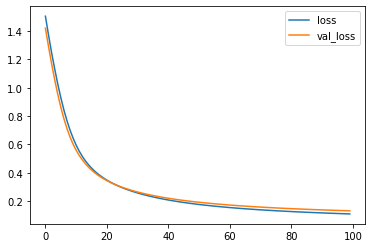

In [18]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

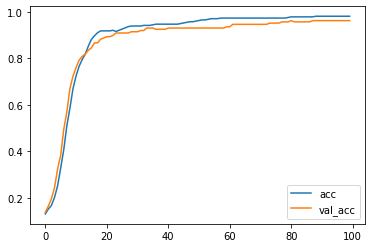

In [19]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [20]:
P = model.predict(X_test)
print(P)

[[9.9701351e-01]
 [6.1496198e-03]
 [9.0125144e-02]
 [9.9235940e-01]
 [9.9789190e-01]
 [1.4429906e-01]
 [3.2190641e-05]
 [9.9773914e-01]
 [9.0790015e-01]
 [9.5358044e-01]
 [4.0268898e-04]
 [1.4319685e-01]
 [1.0000646e-02]
 [5.7888538e-02]
 [9.1184187e-01]
 [9.8510933e-01]
 [5.8197975e-04]
 [1.0092556e-03]
 [2.8916985e-02]
 [9.3778223e-01]
 [1.7214686e-02]
 [8.5515290e-02]
 [1.9236505e-03]
 [9.2483014e-01]
 [1.3756454e-03]
 [1.9167066e-03]
 [4.1678548e-04]
 [4.6342283e-02]
 [9.1622913e-01]
 [8.1541657e-02]
 [8.3073986e-01]
 [1.5807152e-04]
 [4.7172010e-03]
 [6.7344087e-01]
 [9.6569097e-01]
 [7.8844738e-01]
 [4.9095750e-03]
 [3.1939870e-01]
 [9.9861240e-01]
 [9.6784151e-01]
 [8.9359128e-01]
 [9.7922653e-01]
 [9.6530712e-01]
 [9.6091926e-01]
 [8.9609063e-01]
 [9.9366653e-01]
 [1.0612011e-03]
 [2.3753434e-01]
 [2.1217167e-01]
 [9.8263419e-01]
 [3.0774653e-01]
 [9.4291747e-01]
 [9.8176402e-01]
 [5.9283316e-01]
 [9.7005016e-01]
 [3.2644272e-03]
 [2.3692846e-04]
 [9.9655348e-01]
 [1.8501610e-0

In [21]:
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1.]


In [22]:
print("Manually calculated acc: ", np.mean(P == y_test))
print("Evaluate output: ", model.evaluate(X_test, y_test))

Manually calculated acc:  0.9627659574468085
6/6 [==============================] - 0s 4ms/step - loss: 0.1307 - accuracy: 0.9628
Evaluate output:  [0.13067112863063812, 0.9627659320831299]


In [23]:
model.save('linearclassifier.h5')

In [24]:
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K May 27 02:40 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K May 17 13:39 sample_data


In [25]:
model = tf.keras.models.load_model('linearclassifier.h5')

In [26]:
print(model.layers)

In [27]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.1307 - accuracy: 0.9628


[0.13067112863063812, 0.9627659320831299]